# How to compute with Tannakian symbols and multiplicative functions 


This notebook is meant to accompany the article _New perspectives on multiplicative functions_ by Espeseth, Holmstrom and Vik. 

We begin with some motivation, followed by an overview of what is currently implemented in Sage, divided into the following main sections:

* TS of a commutative monoid
* TS of a commutative ring
* TS of the complex numbers
* Methods for multiplicative functions

## Motivation

Let $Mult(\mathbb{C})$ be the set of all multiplicative functions (from the positive integers to the complex numbers). This set contains for example the Euler phi function, the Mobius mu function, the divisor functions $\sigma_k$, the Liouville function, and many other classical number-theoretic functions. In addition, every number-theoretic object with an L-function (such as a motive, a scheme, a Galois representation or an automorphic representation) also has an associated multiplicative function, obtained by reading off the coefficients of the Dirichlet series describing the L-function. Finally, many number-theoretic functions which are not multiplicative, can be interpreted within the framework of multiplicative functions, if we allow more general target rings than $\mathbb{C}$. 

References for the first paragraph: [Wikipedia: L-function](https://en.wikipedia.org/wiki/L-function), [Terence Tao: Derived multiplicative functions](https://terrytao.wordpress.com/2014/09/24/derived-multiplicative-functions/)

The set of multiplicative functions comes with many binary operations, such as Dirichlet convolution, unitary convolution, and the usual (pointwise) product of functions. It also carries many unary operations studied in the literature, such as the k'th convolute, the norm and higher norm operators of Redmond and Sivaramakrishnan, operators given by precomposition with $n \mapsto n^k$, and many others. A natural question is this: _What kind of algebraic structure is $Mult(\mathbb{C})$_?

In a paper (which is currently in fairly readable draft form) we review all operations studied in the literature, and show that they are all part of a rich algebraic structure which is closely related to the notion of a lambda-ring, first invented by Grothendieck. This unifies and clarifies many previously unrelated phenomena in number theory.

The notion of a lambda-ring appears naturally in many different parts of mathematics:
* The representation ring of a finite group is a lambda-ring
* More generally, the Grothendieck ring of a symmetric monoidal abelian category is a lambda-ring
* Any binomial ring (in the sense of Hall) is a lambda-ring
* The topological K-theory of a topological space is a lambda-ring
* Any commutative monoid algebra is a lambda-ring
* There are close relations between lambda-rings and the theory of Witt vectors

References: [Wikipedia: Lambda-ring](https://en.wikipedia.org/wiki/%CE%9B-ring), [Yau: Lambda-rings](https://books.google.co.uk/books/about/Lambda_rings.html?id=d7vKnjxyvxQC).

Lambda-rings are not currently implemented in Sage. We are not aiming for an abstract implementation of lambda-rings (although this could perhaps be interesting), but rather a practical implementation of _Tannakian symbols_, which is a tool for computations in lambda-rings, analogous to the way matrices are a tool for computations in associative algebras, and polynomials are a tool for computations in commutative rings.

## Very brief review of Tannakian symbols

For a more detailed discussion of what Tannakian symbols are good for and which lambda-rings can be described in this language, we refer to the article. Here we collect the main points very briefly.

* For any commutative monoid M, we can form TS(M), which is a commutative ring equipped with additional operations making in into a lambda-ring. 
* When $M$ is just a commutative monoid (with no additional structure), $TS(M)$ is just the same thing as the monoid algebra $\mathbb{Z}[M]$.
* The elements of $TS(M)$ are called Tannakian symbols. Such an element as an ordered pair of disjoint finite multisets with elements taken from $M$. We write an element on the form $\frac{A}{B}$ where $A$ and $B$ are multisets. For example: 
$$ \frac{ \{2, 5, 5 \} }{ \{1, -1 \} }  $$
is a Tannakian symbol (with entries taken from $\mathbb{Z}$).
* In the Tannakian symbol $\frac{A}{B}$, we refer to $A$ as the _upstairs_ multiset, and to $B$ as the _downstairs_ multiset.
* Any commutative ring $R$ is in particular a multiplicative monoid, and hence we can form $TS(R)$. This is not just a lambda-ring, but carries an even richer structure, with many different algebraic operations (in the article, we introduce axioms for "double Adams algebras", which describe these operations). 
* If the ring $R$ happens to be the complex numbers, even more operations arise naturally, many of which are described below.
* TS is a functor, in the simplest setting from the category of commutative monoids to the category of lambda-rings.
* There is a correspondence between a certain class of multiplicative functions (the rational ones) and a certain class of Tannakian symbols, and from this it follows that there is a close relation between operations on Tannakian symbols and operations on multiplicative functions.

## Getting started with computations

In any Jupyter notebook or Sage worksheet, start by importing the following files: 

In [11]:
%runfile ../General-Tools/LazyList.sage
%runfile ../TS-Methods/MonoidTS.sage
%runfile ../TS-Methods/RingTS.sage
%runfile ../Sequence-Methods/Berlekamp.sage
%runfile ../TS-Methods/ComplexTS.sage

In a Sage worksheet, use "%attach" instead of "%runfile".

## TS of a commutative monoid

Now to some examples. 

We create four variables, which can be multiplied in Sage.

In [12]:
a = var('a'); b = var('b'); c = var('c'); d = var('d');

Let $F$ be a monoid in which these variables live. We can now create the lambda-ring $TS(F)$.

In [13]:

#This code is commented out - can use it later if we find a way of improving the printing of monoid elements.
#reset('a'); reset('b'); reset('c'); reset('d');
#F.<a,b,c,d> = Monoids().Commutative().free(); 
#print a*b
#To get TS of the free commutative monoid on a, b, c, d, we would do this:
#TSF = TannakianSymbols(ZZ, F)  
#
#The above command works perfectly well, but because of the ugly printing issue, we use a work-around instead, 
#with the ring Z[a, b, c, d] as our monoid.
TSF = TannakianSymbols(ZZ, ZZ)

We can multiply indivindual elements of the monoid:

In [14]:
a * b * c * a * c^4

a^2*b*c^5

To build a Tannakian symbol from a string, we use TSF.parseSymbol, and it will be convenient to introduce an abbreviation for this command.

In [15]:
ts = TSF.parseSymbol

Now let's create a few Tannakian symbols in the ring $TS(F)$. We call these symbols $X, Y$ and $Z$.


In [16]:
X = ts("{a, b}/{c, d }")

For the empty multiset, we may use the Norwegian letter Ø or simply {}.

In [17]:
Y = ts("{a}/Ø")

Since we use multisets and not just sets, we may have repeated elements:

In [18]:
Z = ts("{a}/{c, c, c}")

We can print Tannakian symbols.

In [19]:
print X; print Y; print Z

{b, a}/{c, d}
{a}/Ø
{a}/{c, c, c}


We can add and multiply Tannakian symbols. These operations are (for good mathematical reasons) referred to as the "direct sum" and the "tensor product" in our article and elsewhere.

In [20]:
X + X

{b, b, a, a}/{c, c, d, d}

In [21]:
X + Y

{b, a, a}/{c, d}

In [22]:
X * Y

{a^2, a*b}/{a*c, a*d}

In [23]:
Z^2

{c^2, c^2, c^2, c^2, c^2, c^2, c^2, c^2, c^2, a^2}/{a*c, a*c, a*c, a*c, a*c, a*c}

We can subtract a symbol from another symbol. The zero element of the ring $TS(F)$ is $\emptyset / \emptyset$.

In [24]:
X - X

Ø/Ø

We can extract a list of the elements upstairs, or a list of the elements downstairs:

In [25]:
Z.upstairs()

[a]

In [26]:
Z.downstairs()

[c, c, c]

We can also compute a few invariants of a Tannakian symbol, namely _even dimension_ (number of elements upstairs), _odd dimension_ (the number of elements downstairs, and the _augmentation_ (the difference between the even and the odd dimension).

In [27]:
print "The symbol Z is:", Z
print "Even dimension:", Z.evendimension() 
print "Odd dimension:", Z.odddimension() 
print "Augmentation:", Z.augmentation() 

The symbol Z is: {a}/{c, c, c}
Even dimension: 1
Odd dimension: 3
Augmentation: -2


The ordered pair of integers defined by the even and the odd dimension can be produced directly using the "superdimension" command":

In [28]:
print "Superdimension:", Z.superdimension()

Superdimension: (1, 3)


We have also introduced the determinant of a symbol, which is defined whenever the elements downstairs have inverses. For example, if the monoid happens to be a group, the determinant is defined for all Tannakian symbols.

In [29]:
print "Determinant:", Z.determinant()

Determinant: a/c^3


We are not explaining the axioms for lambda-rings here, but any lambda-ring carries four infinite sequences of unary operations. We illustrate each of these with a few examples.

First: lambda operations. In standard mathematical notation, for every non-negative integer $k$ there is a unary operation $\lambda^k$ from $TS(M)$ to $TS(M)$. Below we print the symbol $X$, and then we compute $\lambda^k(X)$ for a few small values of $k$.

In [30]:
print "The symbol X is:", X
print "Applying lambda-operations for $k = 1, 2, ..., we get:"
print X.lambdaoperation(1)
print X.lambdaoperation(2)
print X.lambdaoperation(3)
print X.lambdaoperation(4)

The symbol X is: {b, a}/{c, d}
Applying lambda-operations for $k = 1, 2, ..., we get:
{b, a}/{c, d}
{c*d, c^2, d^2, a*b}/{b*d, b*c, a*c, a*d}
{b*c^2, b*d^2, a*c^2, a*d^2, a*c*d, b*c*d}/{c*d^2, a*b*c, c^2*d, a*b*d, d^3, c^3}
{c*d^3, c^3*d, c^2*d^2, a*b*d^2, a*b*c^2, d^4, a*b*c*d, c^4}/{b*c^3, b*d^3, a*c*d^2, a*c^2*d, a*c^3, b*c^2*d, b*c*d^2, a*d^3}


Secondly: Adams operations. In standard mathematical notation, for every non-negative integer $k$, there is a unary operation $\psi^k$ from $TS(M)$ to $TS(M)$. These operations are different from the others in that they are ring endomorphisms rather than just functions. Below we print the symbol $X$, and then we compute $\psi^k(X)$ for a few small values of $k$.

In [31]:
print X

print X.adamsoperation(1)
print X.adamsoperation(2)
print X.adamsoperation(3)
print X.adamsoperation(4)

{b, a}/{c, d}
{b, a}/{c, d}
{a^2, b^2}/{c^2, d^2}
{a^3, b^3}/{c^3, d^3}
{a^4, b^4}/{c^4, d^4}


Thirdly: gamma operations. In standard mathematical notation, for every non-negative integer $k$, there is a unary operation $\gamma^k$ from $TS(M)$ to $TS(M)$. Below we print the symbol $X$, and then we compute $\gamma^k(X)$ for a few small values of $k$.

In [32]:
print X

print X.gammaoperation(1)
print X.gammaoperation(2)
print X.gammaoperation(3)
print X.gammaoperation(4)

{b, a}/{c, d}
{b, a}/{c, d}
{c*d, b, a, d^2, c^2, a*b}/{a*d, b*d, b*c, a*c, d, c}
{a*c*d, d^2, d^2, a*c^2, b*c*d, b*c^2, c*d, c*d, c^2, c^2, b*d^2, a, b, a*d^2, a*b, a*b}/{a*b*c, a*c, a*c, d, d^3, b*d, b*d, c*d^2, c^2*d, b*c, b*c, a*b*d, c, a*d, a*d, c^3}
{a*c*d, a*c*d, a*c*d, d^2, d^2, d^2, d^4, a*b*c*d, c*d^3, c*d, c*d, c*d, c^3*d, c^2*d^2, a*d^2, a*d^2, a*d^2, c^2, c^2, c^2, c^4, a*b*c^2, a*c^2, a*c^2, a*c^2, b*c*d, b*c*d, b*c*d, b*c^2, b*c^2, b*c^2, b*d^2, b*d^2, b*d^2, a*b*d^2, b, a, a*b, a*b, a*b}/{a*c*d^2, a*c^2*d, d, d^3, d^3, d^3, c*d^2, c*d^2, c*d^2, c^2*d, c^2*d, c^2*d, a*d^3, c^3, c^3, c^3, a*b*c, a*b*c, a*b*c, a*c, a*c, a*c, a*c^3, b*c^2*d, b*c*d^2, b*c^3, a*d, a*d, a*d, b*d, b*d, b*d, b*c, b*c, b*c, b*d^3, a*b*d, a*b*d, a*b*d, c}


Finally, we also have symmetric power operations. For every non-negative integer $k$, there is a unary operation $Sym^k$ from $TS(M)$ to $TS(M)$. Again, we print the symbol $X$, and then we compute $Sym^k(X)$ for a few small values of $k$.

In [33]:
print X

print X.symmetricpoweroperation(1)
print X.symmetricpoweroperation(2)
print X.symmetricpoweroperation(3)
print X.symmetricpoweroperation(4)

{b, a}/{c, d}
{b, a}/{c, d}
{a^2, c*d, b^2, a*b}/{a*d, b*d, b*c, a*c}
{a^3, a*c*d, b*c*d, a*b^2, b^3, a^2*b}/{a*b*c, a^2*c, b^2*d, b^2*c, a*b*d, a^2*d}
{a^2*c*d, a^4, b^2*c*d, b^4, a*b^3, a*b*c*d, a^2*b^2, a^3*b}/{a^2*b*c, a^3*c, a*b^2*c, b^3*c, b^3*d, a^2*b*d, a*b^2*d, a^3*d}


All the commands we have used so far are defined in the file MonoidTS.sage. This file contains the definition of the class TannakianSymbols, which extends the class CombinatorialFreeModule. Feel free to inspect the source code and ask Torstein Vik if anything is unclear :-)

## TS of a commutative ring

As we have already mentioned, we may consider $TS(R)$, where $R$ is not just a commutative (multiplicative) monoid, but a commutative ring. In this richer setting, we have a number of additional algebraic operations and invariants. At the moment, only three commands are implemented in the generality of general commutative rings, and everything else is done for complex numbers only (see next section).

To get access to these new commands, we must define TSR using the class "RingTannakianSymbols", and redefine $X, Y, Z$ as elements of TSR. We also define the convenient abbreviation "ts" again.

In [34]:
TSR = RingTannakianSymbols(ZZ[a, b, c, d])

ts = TSR.parseSymbol

X = ts("{a, b}/{c, d }")
Y = ts("{a}/Ø")
Z = ts("{a}/{c, c, c}")

The simplest new invariant is given by the _trace_ of a Tannakian symbol. It is the sum of the elements upstairs, minus the sum of the elements downstairs.

In [35]:
print "Trace of Z:", Z.trace()
print "Trace of X:", X.trace()

Trace of Z: a - 3*c
Trace of X: a + b - c - d


The trace is an element in a certain infinite sequence associated to a Tannakian symbol, called _the sequence of Bell coefficients_. This is a linearly recursive sequence of elements in the ring $R$, whose zero'th element is 1, whose first element is the trace, and in general has the property that the power series corresponding to the sequence is the same as the rational power series defined by a certain rational expression which contains the elements from the Tannakian symbol. See the article for more details.

Examples:

In [36]:
print "First 3 Bell coefficients of Z:", Z.getBellCoefficients(3)

First 3 Bell coefficients of Z: 1, a - 3*c, a^2 - 3*a*c + 3*c^2, ...


Note that an object of the form Z.getBellCoefficients behaves like an infinite list. This feature relies on the class LazyList which was imported at the very top of this document. Printing this object currently produces a printout of the first 20 elements (this is an arbitrary convention that seemed reasonable).

We use the symbol Y to illustrate this point:

In [37]:
print "The symbol Y is", Y
bc = Y.getBellCoefficients()
print bc[3]
print bc[30]
print bc

The symbol Y is {a}/Ø
a^3
a^30
1, a, a^2, a^3, a^4, a^5, a^6, a^7, a^8, a^9, a^10, a^11, a^12, a^13, a^14, a^15, a^16, a^17, a^18, a^19, ...


Replacing Y by a more complicated symbol is fine, but gives (unsurprisingly) a more complicated output.

In [38]:
U = ts("{a}/{b}")
print "The symbol U is", U
bc = U.getBellCoefficients()
print bc[3]
print bc[30]
print bc

The symbol U is {a}/{b}
a^3 - a^2*b
a^30 - a^29*b
1, a - b, a^2 - a*b, a^3 - a^2*b, a^4 - a^3*b, a^5 - a^4*b, a^6 - a^5*b, a^7 - a^6*b, a^8 - a^7*b, a^9 - a^8*b, a^10 - a^9*b, a^11 - a^10*b, a^12 - a^11*b, a^13 - a^12*b, a^14 - a^13*b, a^15 - a^14*b, a^16 - a^15*b, a^17 - a^16*b, a^18 - a^17*b, a^19 - a^18*b, ...


There is also another similar sequence associated to a Tannakian symbol, referred to as the sequence of point counts. This sequence can be computed by the command "getPointCounts".

In [39]:
print "The symbol U is", U
bc = U.getPointCounts()
print bc[3]
print bc[30]
print bc

The symbol U is {a}/{b}
a^3 - b^3
a^30 - b^30
1, a - b, a^2 - b^2, a^3 - b^3, a^4 - b^4, a^5 - b^5, a^6 - b^6, a^7 - b^7, a^8 - b^8, a^9 - b^9, a^10 - b^10, a^11 - b^11, a^12 - b^12, a^13 - b^13, a^14 - b^14, a^15 - b^15, a^16 - b^16, a^17 - b^17, a^18 - b^18, a^19 - b^19, ...


We can of course combine these methods with some of those defined earlier. Here are a few examples:

In [40]:
(U+Y).symmetricpoweroperation(5)

{a^5, a^5, a^5, a^5, a^5, a^5}/{a^4*b, a^4*b, a^4*b, a^4*b, a^4*b}

In [41]:
(Z-X).gammaoperation(3)

{c^2, c^2, c^2, c^2, c^2, c^2, b*c, b*c, b*c, b*c, b^2, b^2, b^2*d, c^2*d, c^2*d, c^2*d, b*c*d, b*c*d, d}/{b*c^2, b*c^2, b*c^2, c*d, c*d, c*d, c*d, b*d, b*d, b^2*c, b^2*c, b, b^3, c, c, c^3, c^3, c^3, c^3}

We can investigate how the superdimension of $\gamma^k \big( \frac{\{a, b\}}{\emptyset} \big)$ varies with $k$:

In [42]:
W = ts("{a, b}/{}")
print W
for k in range(1,10):
    print (W.gammaoperation(k)).superdimension()

{b, a}/Ø
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)


There is a close relationship between these various operations and the theory of symmetric polynomials, as illustrated in the following examples:

In [43]:
W = ts("{a, b, c}/{}")
print "We use the symbol W as input. W equals", W
print "Applying lambda-operations for $k = 1, 2, 3, 4$, in each case followed by the trace function, we get:"
for k in range(1, 5):
    print "k =", k, ":",  (W.lambdaoperation(k)).trace()

We use the symbol W as input. W equals {b, c, a}/Ø
Applying lambda-operations for $k = 1, 2, 3, 4$, in each case followed by the trace function, we get:
k = 1 : a + b + c
k = 2 : a*b + a*c + b*c
k = 3 : a*b*c
k = 4 : 0


In [44]:
W = ts("{a, b, c}/{}")
print "We use the symbol W as input. W equals", W
print "Applying Adams operations for $k = 1, 2, 3, 4$, in each case followed by the trace function, we get:"
for k in range(1, 5):
    print "k =", k, ":",  (W.adamsoperation(k)).trace()

We use the symbol W as input. W equals {b, c, a}/Ø
Applying Adams operations for $k = 1, 2, 3, 4$, in each case followed by the trace function, we get:
k = 1 : a + b + c
k = 2 : a^2 + b^2 + c^2
k = 3 : a^3 + b^3 + c^3
k = 4 : a^4 + b^4 + c^4


In [45]:
W = ts("{a, b, c}/{}")
print "We use the symbol W as input. W equals", W
print "Applying symmetric power operations for $k = 1, 2, 3, 4$, in each case followed by the trace function, we get:"
for k in range(1, 5):
    print "k =", k, ":",  (W.symmetricpoweroperation(k)).trace()

We use the symbol W as input. W equals {b, c, a}/Ø
Applying symmetric power operations for $k = 1, 2, 3, 4$, in each case followed by the trace function, we get:
k = 1 : a + b + c
k = 2 : a^2 + a*b + b^2 + a*c + b*c + c^2
k = 3 : a^3 + a^2*b + a*b^2 + b^3 + a^2*c + a*b*c + b^2*c + a*c^2 + b*c^2 + c^3
k = 4 : a^4 + a^3*b + a^2*b^2 + a*b^3 + b^4 + a^3*c + a^2*b*c + a*b^2*c + b^3*c + a^2*c^2 + a*b*c^2 + b^2*c^2 + a*c^3 + b*c^3 + c^4


In [46]:
W = ts("{a, b, c}/{}")
print "We use the symbol W as input. W equals", W
print "Applying gamma-operations for $k = 1, 2, 3, 4$, in each case followed by the trace function, we get:"
for k in range(1, 5):
    print "k =", k, ":",  (W.gammaoperation(k)).trace()

We use the symbol W as input. W equals {b, c, a}/Ø
Applying gamma-operations for $k = 1, 2, 3, 4$, in each case followed by the trace function, we get:
k = 1 : a + b + c
k = 2 : a*b + a*c + b*c + a + b + c
k = 3 : a*b*c + 2*a*b + 2*a*c + 2*b*c + a + b + c
k = 4 : 3*a*b*c + 3*a*b + 3*a*c + 3*b*c + a + b + c


The methods that have been described here for $TS(R)$ are all defined in the file RingTS.sage.

## TS of the complex numbers

We begin by constructing $TS(\mathbb{C}^{\times})$, which is the functor $TS$ applied to the commutative monoid of non-zero complex numbers. We also redefine the command "ts" and introduce a few example symbols.

In [47]:
TSC = ComplexTannakianSymbols()

ts = TSC.parseSymbol

X = ts("{2, 3}/{-1, -1 }")
Y = ts("{1+I, 1-I}/Ø")
Z = ts("{-2}/{I, I, 4*I}")

All the commands introduced above also work for complex Tannakian symbols. A few examples:

In [48]:
print X * Y

{-3*I + 3, 2*I + 2, -2*I + 2, 3*I + 3}/{I - 1, I - 1, -I - 1, -I - 1}


In [49]:
print Z
print Z.determinant()
print Z.trace()

{-2}/{4*I, I, I}
-0.500000000000000*I
-6*I - 2


In [50]:
print Z.symmetricpoweroperation(3)

{2, 8, 8, -8}/{-4*I, 16*I, 4*I, 4*I}


In [51]:
print Z.getBellCoefficients()

1, -6*I - 2, 12*I - 5, -20*I + 10, 40*I - 20, -80*I + 40, 160*I - 80, -320*I + 160, 640*I - 320, -1280*I + 640, 2560*I - 1280, -5120*I + 2560, 10240*I - 5120, -20480*I + 10240, 40960*I - 20480, -81920*I + 40960, 163840*I - 81920, -327680*I + 163840, 655360*I - 327680, -1310720*I + 655360, ...


We also have a plethora of new operations. Some of these really exist in greater generality (for TS(R) when $R$ is a general commutative ring, or a commutative ring satisfying some extra properties), but have only been implemented for complex numbers. 

The main difficulty when implementing these operations is that some of them rely on the Berlekamp-Massey algorithm, which takes a linearly recursive sequence as input, and returns two polynomials whose quotient is a generating series for the input sequence. The version of Berlekamp-Massey that we use was written by Magnus Hellebust Haaland and Olav Hellebust Haaland, and works well when the input is an integer sequence of fairly low recursion degree (we should specify here what this means, it seems anything under 20 is fine, must do some more testing here).

#### Box sum, box product, and showplot

To begin with, we have the "box sum" and the "box product". Both of these operations rely on Berlekamp-Massey.

In [52]:
TSC.boxsum(X, X)

{2.00000000000000, 3.00000000000000}/{0.424428900898052, -9.42442890089805}

In [53]:
TSC.boxproduct(X, Y)

{2.00000000000000 + 2.00000000000000*I, 3.00000000000000 + 3.00000000000000*I, 3.00000000000000 - 3.00000000000000*I, 2.00000000000000 - 2.00000000000000*I}/{4.11890620431312, -1.19938408212681, 0.642445436872232, -7.56196755905854}

In [54]:
W = TSC.boxsum(X+X, Y)
print W

{2.00000000000000, 2.00000000000000, 3.00000000000000, 3.00000000000000, 1.00000000000000 + 1.00000000000000*I, 1.00000000000000 - 1.00000000000000*I}/{1.13464943699668 + 0.845975055495813*I, 0.727443849909087 + 2.48156012921520*I, -8.35001552475946, 0.727443849909087 - 2.48156012921520*I, 1.13464943699668 - 0.845975055495813*I, 0.625828950947925}


If you feel that this looks a bit messy, you may print the elements one at a time instead:

In [55]:
print "Upstairs:"
for x in W.upstairs(): print x
print "Downstairs:"
for x in W.downstairs(): print x

Upstairs:
2.00000000000000
2.00000000000000
3.00000000000000
3.00000000000000
1.00000000000000 + 1.00000000000000*I
1.00000000000000 - 1.00000000000000*I
Downstairs:
1.13464943699668 + 0.845975055495813*I
0.727443849909087 + 2.48156012921520*I
-8.35001552475946
0.727443849909087 - 2.48156012921520*I
1.13464943699668 - 0.845975055495813*I
0.625828950947925


If you prefer a plot of the elements in the complex plane, use the showplot command. Here the upstairs elements are shown in blue (by default), while the downstairs element are shown in red. A larger circle indicates that the multiplicity is higher than 1.

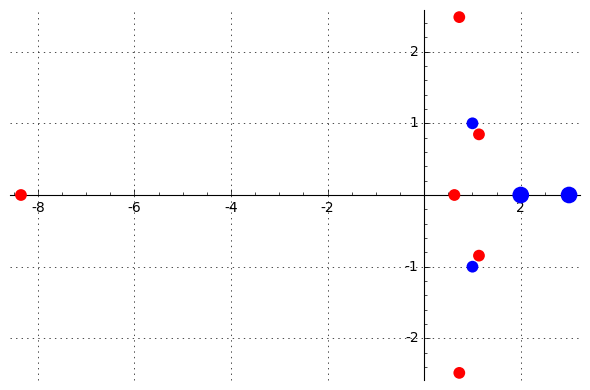

In [56]:
W.showplot()

#### Berlekamp-Massey manual tuning

Sometimes, computing a boxproduct or a boxsum does not work, with the error message saying that "Berlekamp produced an empty list". Here's an example:

In [57]:
TSC.boxproduct(X+X+X, X+Y)

ArithmeticError: Berlekamp produced an empty list

When this happens, one can tweak a parameter in the Berlekamp-Massey algorithm, which is the number of sequence entries that the algorithm uses for detecting a possible linear recursion. The default value here is 20. In many cases, this number has to be increased, but in some cases (where the list contains very large integers), the value should instead be decreased from 20 to something smaller.

Repeating the above calculation with a tweaked parameter, one can check that it still does not work for 30 or 40, but trying with 50, we get the right answer!

In [58]:
Q = TSC.boxproduct(X+X+X, X+Y, 50); Q

{4.00000000000000, 4.00000000000000, 4.00000000000000, 6.00000000000000, 6.00000000000000, 6.00000000000000, 2.00000000000000 + 2.00000000000000*I, 2.00000000000000 + 2.00000000000000*I, 2.00000000000000 + 2.00000000000000*I, 9.00000000000000, 9.00000000000000, 9.00000000000000, 3.00000000000000 + 3.00000000000000*I, 3.00000000000000 + 3.00000000000000*I, 3.00000000000000 + 3.00000000000000*I, 3.00000000000000 - 3.00000000000000*I, 3.00000000000000 - 3.00000000000000*I, 3.00000000000000 - 3.00000000000000*I, 2.00000000000000 - 2.00000000000000*I, 2.00000000000000 - 2.00000000000000*I, 2.00000000000000 - 2.00000000000000*I}/{1.97402328423270 - 0.713180819849066*I, 6.08158955706044 - 1.47890532545033*I, 4.57363369045455 + 5.46699179602522*I, -117.220408118257, 4.45495222669387 - 2.83127783132349*I, -1.38882569295055, 4.57363369045455 - 5.46699179602522*I, -20.1131470884396, 4.45495222669387 + 2.83127783132349*I, -1.56849815959956, 2.91212167269597 - 1.22630317205507*I, 0.246598672988622,

Let's plot the elements of this symbol as well:

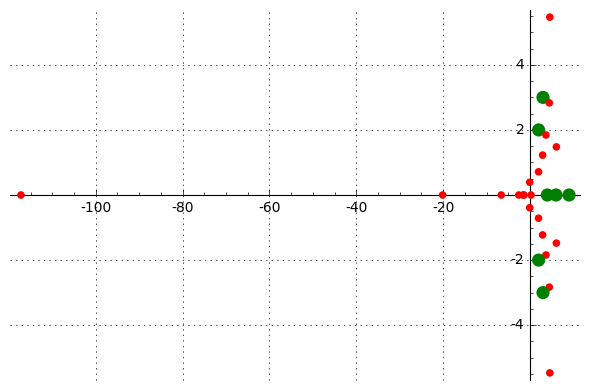

In [59]:
Q.showplot(dotsize=30, upstairscolor="green")

#### Problems with rounding errors

Sometimes, we make a computation in which the output is affected by rounding errors. In such a case, we can force the numbers to be rounded to integers or to Gaussian integers.

In [60]:
Q_Bell = Q.getBellCoefficients(10)
Q_Bell_rounded = Q.getBellCoefficients(10).toNearestGaussianIntegers()
for i in range(11): print "The number", Q_Bell[i], "has been rounded to", Q_Bell_rounded[i]


The number 1 has been rounded to 1.0
The number 189.000000000000 has been rounded to 189
The number 10902.0000000000 - 2.66453525910038e-15*I has been rounded to 10902
The number 350714.000000000 - 5.03597163969971e-13*I has been rounded to 350714
The number 8.04283199999997e6 - 2.89919199758515e-11*I has been rounded to 8042832
The number 1.49369184000001e8 - 9.23473564284904e-10*I has been rounded to 149369184
The number 2.41484544000023e9 - 2.07616305184880e-8*I has been rounded to 2414845440
The number 3.54491354880324e10 - 3.75560895804482e-7*I has been rounded to 35449135488
The number 4.84651454979880e11 - 5.90871962898590e-6*I has been rounded to 484651454980
The number 6.27199967284945e12 - 0.0000846327390440304*I has been rounded to 6271999672849
The number 7.76970554940096e13 - 0.00113250593040409*I has been rounded to 77697055494010


As you can see from the final few entries above, the rounding errors are at first extremely small, but as we move towards the final entries, they become larger.

The next example show that these errors may create serious problems in methods that pass from Bell coefficients to the Tannakian symbol and/or back again. These problems are due to rounding errors when we list the reciprocal roots of a polynomial as elements in the Tannakian symbol, and later recover the Bell coefficients from the Tannakian symbol. In the latter step here, we apply Adams operations followed by the trace operator, and most likely the bad rounding happens when we apply the Adams operations for big values of $k$. 

A solution to all this might be to use a version of the complex numbers with higher precision, or (and we should do this in the future) switch to complex interval arithmetic.

Note that for normal applications to classical multiplicative functions, these rounding errors rarely create problems, since the linear recursion degrees tend to be small.

In [61]:
#Run this code if you want to see the the bad rounding errors taking effect around i=12.
#for i in range(14):
#    print "i = ", i
#    print Q.getBellCoefficients()[i]
#    print Q.getBellCoefficients().toNearestGaussianIntegers()[i]
#    print Q.getBellCoefficients().toNearestIntegers()[i]

#### Creating Tannakian symbols from lists of Bell coefficients or point counts

In [62]:
TSC.getTSFromBellCoeffs([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

{1.00000000000000, 1.00000000000000}/Ø

In [63]:
TSC.getTSFromPointCounts([1, 3, 7, 15, 31, 63, 127])

{2.00000000000000, 2.00000000000000}/{1.00000000000000}

#### Circle action and box action

In [64]:
X = ts("{2, 3}/{-1, -1 }")
X.circleaction(2)

{2.00000000000000, 2.00000000000000, 3.00000000000000, 3.00000000000000}/{-1.00000000000000, -1.00000000000000, -1.00000000000000, -1.00000000000000}

In [65]:
X.boxaction(7)

{2.00000000000000, 3.00000000000000}/{0.649503305812249, -44.6495033058122}

NOTE: Circle action currently seems a bit unstable, with pari errors appearing for example if you try "X.circleaction(3)" above. In any case, these operations are not super-important for our current applications.

#### More Adams operations

The Adams-hat operation are not defined for most Tannakian symbols, but we have implemented an attempt, which will usually produce an error message. In the language of the article, this operation does not preserve the class of rational multiplicative functions.

In [66]:
#X.adamshatoperation(4)

The box-adams operation is implemented...

In [67]:
X.boxadamsoperation(3)

{8.00000000000000, 27.0000000000000}/{-0.496527945210617, -72.5034720547894}

... and so is the box-hat adams operation:

In [68]:
X.boxadamshatoperation(3)

{1.44224957030741, -0.721124785153704 - 1.24902476648341*I, 1.25992104989487, -0.629960524947437 - 1.09112363597172*I, -0.629960524947437 + 1.09112363597172*I, -0.721124785153704 + 1.24902476648341*I}/{0.500000000000000 + 0.866025403784439*I, 0.500000000000000 + 0.866025403784439*I, 0.500000000000000 - 0.866025403784439*I, 0.500000000000000 - 0.866025403784439*I, -1.00000000000000, -1.00000000000000}

## Summary

From the comments to the file MonoidTS.sage:

In [69]:
### Methods for Tannakian symbols with elements from a general commutative monoid
###
### Binary operations:     Direct sum (+)
###                        Tensor product (*)
###
### Unary operations:      lambdaoperation
###                        adamsoperation
###                        gammaoperation
###                        symmetricpoweroperation
###
### Invariants:            determintant
###                        augmentation
###                        evendimension
###                        odddimension
###                        superdimension
###
### Factory methods:       createElement
###                        parseSymbol
###
### Printing methods:      _repr_
###                        _latex_
###
### Other:                 upstairs
###                        downstairs

From the comments to the file RingTS.sage:

In [70]:
### Requires LazyList.sage, Berlekamp.sage, MonoidTS.sage
###


### Methods for Tannakian symbols with elements from a commutative ring ###
###
### Method for computing the trace of a Tannakian symbol:
###    trace
###
### Methods for extracting list of Bell coefficients/list of point counts as a LazyList:
###    getBellCoefficients
###    getPointCounts
###
### NOTE: The convention used here is that both of these lists have the number 1 as the zero'th element.

From the comments to the file ComplexTS.sage:

In [71]:
### Methods for complex Tannakian symbols ###
###
### Binary operations:     boxsum
###                        boxproduct
###
### Factory methods:       getTSFromBellCoefficients
###                        getTSFromPointCounts
###
### Other:                 liftBellBinaryOp
###                        liftPointCountBinaryOp
###                        liftBellUnaryOp
###                        liftPointCountUnaryOp
###
### C-actions:             circleaction
###                        boxaction
###
### Unary operations:      adamshatoperation
###                        boxadamsoperation
###                        boxadamshatoperation
###
### Helper methods:        reciprocal_roots
###                        BellDerivative
###                        BellAntiderivative
###                        toNearestGaussianInteger
###                        toNearestInteger
###
### Plot methods:          showplot
###
### Global constant:       DEFAULT_BERLEKAMP_LENGTH

Use the built-in help functions to get more info on optional keywords and other syntax, like this:

In [72]:
#X.showplot?

## Playing around

Checking out a probable relation between lambda operations and symmetric power operations:

In [73]:
symbols = map(ts, ["Ø/Ø", "{a}/Ø", "Ø/{a}", "{a, b}/Ø", "Ø/{a, b}", "{a}/{b}", "{a, b}/{c}", "{a}/{b, c}", "{a, b, c}/Ø", "Ø/{a, b, c}"])
for Q in symbols:
    for k in range(0, 10):
        if Q.lambdaoperation(k) != (-1)^k * (-Q).symmetricpoweroperation(k):
            print "Fail on k =", k, "and Q =", Q, "where lambda ->", Q.lambdaoperation(k), "and sympow ->", Q.symmetricpoweroperation(k)
    print "done for", Q
print "done!"

done for Ø/Ø
done for {a}/Ø
done for Ø/{a}
done for {b, a}/Ø
done for Ø/{b, a}
done for {a}/{b}
done for {b, a}/{c}
done for {a}/{b, c}
done for {b, c, a}/Ø
done for Ø/{b, c, a}
done!


## Todo for multiplicative functions

Add support for calling multiplicative functions, for producing zeta types and latex tables of zeta types.

Note the commands available at nt quickref sheet for prime powers.

In [74]:
# Specification for multiplicative functions
#
%runfile ../Classical-Multiplicative-Functions/Multiplicative-Function-Library.sage
#
# printMultiplicativeLibrary()  # Prints a list of functions, perhaps with a little help text on how to use the library
#
# getZetaType(Liouville, 4, 7)  #Produces a simple global zeta type with 4 rows and 7 columns, stored as a list of row lists.
#
# getLaTeXedZetaType(Liouville, 4, 7)   #Prints a Latexed zeta type, just like the code we already have under Latex tools.
# 
# createMultiplicativeFunctionFromList
# createMultiplicativeFunctionFromLazyList
#
# f = createMultiplicativeFunction(sigma_k, k=4)
# g = createMultiplicativeFunction(pow_r, r=1.5)
# Liouville = createMultiplicativeFunction(Liouville)
# f(8)
# Liouville(42)
# f.getRow(8)             #constructs the 8th row of the zeta type, as a LazyList
# boxsum(f, g)            #Want similar methods for all our binary and unary operations
# f.superdimension(p=5)   #Want similar methods for all invariants
#
# multiplicativeFunctionLibrary[sigma_k, k=7, r=5]

In [75]:
loadMultiplicativeLibrary()